# Método de Newton na prática e suas relações com fractais

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Mar 2024



In [ ]:
# Biblioteca de "algebra linear computacional"
import numpy as np

#Acesso a ferramentas de sistema
import sys

#Pacotes para gráficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


## Qual a intenção desse notebook e dessa atividade?

Nesse notebook vamos revisar alguns conceitos de métodos para achar zero de funções e daí explorar casos interessantes de funções complexas e suas relações com fractais.

# Método de Newton na reta real

Definindo uma função e sua derivada

In [ ]:
# Usamos aqui funções "lambda" de Python, que são atalhos rápidos para definição de funções
f = lambda x: x**2-2
df = lambda x: 2*x
d2f = lambda x: 2*(x/x)   #Forma de escrever 1 (x/x) que vale tanto para escalares quanto vetores

root_exact = np.sqrt(2)
#Você poderia de forma análoga definir algo com:
#def f(x):
#    return x**2 - 2
#
#def df(x):
#    return 2*x

Plotando a função

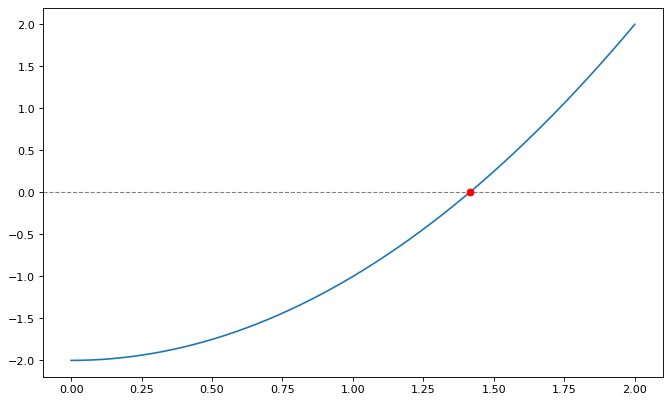

In [ ]:
# Quais pontos quero plotar?
x = np.linspace(0, 2, 1000)

#O painel para o gráfico
fig = plt.figure(figsize=(10, 6), dpi=80)

# Plotar uma linha no zero como referência
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')

#A função
plt.plot(x, f(x))


#A raiz exata
plt.plot(root_exact, f(root_exact), 'ro')

plt.show()

Podemos esperar convergência do método nesse caso? Para qualquer chute inicial?

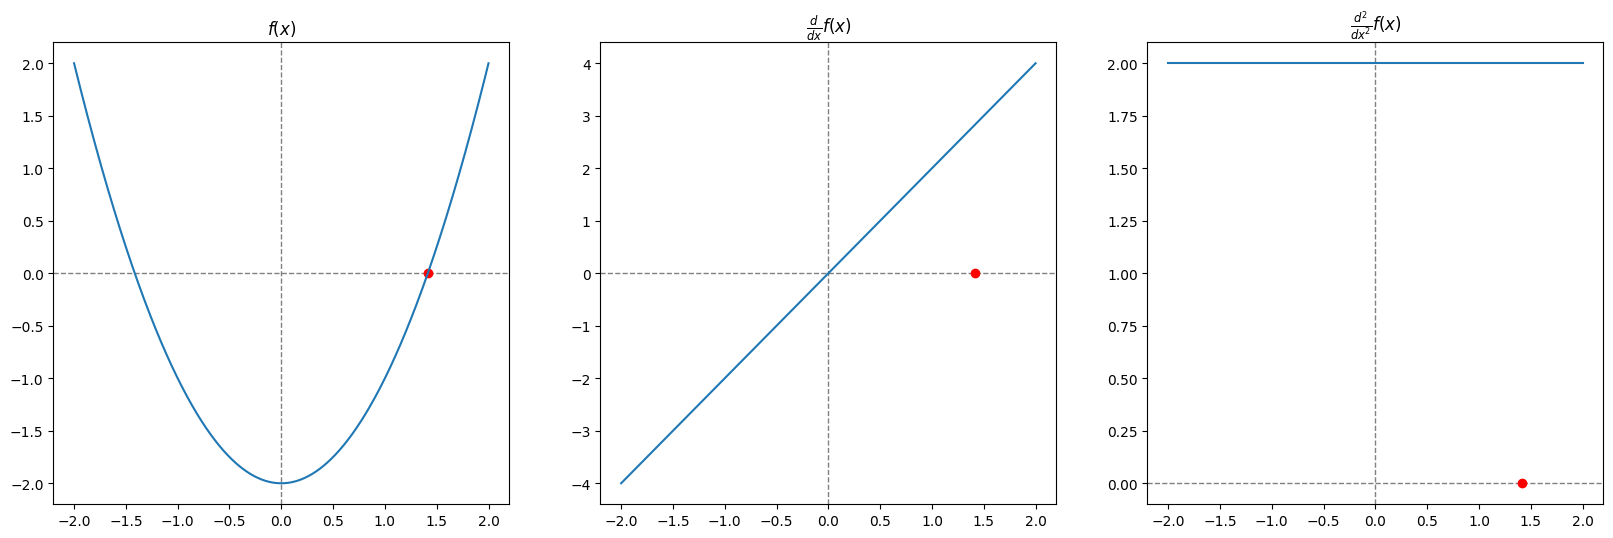

In [ ]:
# Condições do teorema da convexidade
#----------------------------------------

x = np.linspace(-2, 2, 1000)

# Criando uma figura com 3 subfiguras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(hspace=0.4)

# Exibindo eixos auxiliares e a raiz exata para todas as subfiguras
for ax in [ax1, ax2, ax3]:
  ax.axhline(y=0.0, color='grey', lw='1', linestyle='--')
  ax.axvline(x=0.0, color='grey', lw='1', linestyle='--')
  ax.plot(root_exact, f(root_exact), 'ro')

# A função
ax1.plot(x, f(x))
ax1.set_title(r'$f(x)$')

# A derivada primeira
ax2.plot(x, df(x))
ax2.set_title(r'$\frac{d}{dx}f(x)$')

# A derivada segunda
ax3.plot(x, d2f(x))
ax3.set_title(r'$\frac{d^2}{dx^2}f(x)$')

plt.show()

Qual intervalo podemos usar?

## Uma implementação

Dado $x_0$, calculo:

$$ x_{i+1} = x_{i} - f(x_i)/f'(x_i) $$

In [ ]:
# Método de Newton, com parâmetros:
# f   : função
# df  : derivada da função
# x0  : chute inicial
# n   : número de iterações máximo
# tol  : limitar para critério de parada

def newton(f, df, x0, n = 100000, tol=10e-350):

  x = np.zeros(n+1) # o vetor é um pouco maior que preciso...
  #x = np.zeros(n+2, dtype=np.complex64) #vou permitir numeros complexos!
  x[0] = x0

  #Iteradas
  for i in range(n):

    # Se a derivada for muito perto de zero,... sem chances de continuar
    if np.abs(df(x[i])) < 10e-200:
      print("Derivada muito perto de zero...parando em", i, "iterações!")
      return x[:i+1] # Isso faz com o vetor devolvido vá até "i", incluso.

    #Aqui esta o método
    x[i+1] = x[i] - f(x[i])/df(x[i])

    # Critérios de parada
    if np.abs(x[i+1]-x[i]) < tol: #Diferença em x pequena
        print("Parando pois variação entre iteradas está muito pequena!", i, "iterações!")
        return x[:i+2] #Devolvo até o elemento "i+1", incluso, pois este já foi computado

    if np.abs(f(x[i+1])) < tol: # f pequeno
        print("Parando pois a f está ficando muito pequena!", i, "iterações!")
        return x[:i+2] #Devolvo até o elemento "i+1", incluso, pois este já foi computado

  print("Numero máximo de iterações atingido!", n)
  return x

Vamos testar e ilustrar o funcionamento...

Numero máximo de iterações atingido! 2
[2.         1.5        1.41666667]


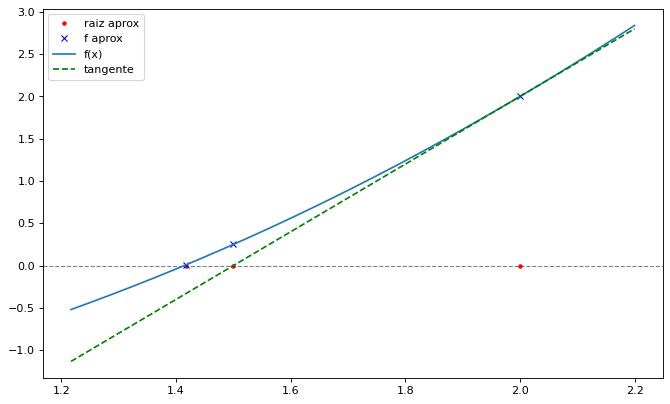

Raiz approx: 1.4166666666666667  exata:  1.4142135623730951
Erro       : 0.002453104293571595


In [ ]:
# Chamando nosso método
root = newton(f, df, x0=2, n = 2)  #2 passos apenas
print(root) # as iteradas até a raíz

#Figura
fig = plt.figure(figsize=(10, 6), dpi=80)

# Plotar uma linha no zero como referência
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')

# As aproximações do "zero"
plt.plot(root, np.zeros_like(root), 'r.', label="raiz aprox")

#O valor da f nas aproximações
plt.plot(root, f(root), 'bx', label="f aprox")

# A função original
x = np.linspace(np.min(root)-0.2, np.max(root)+0.2, 1000)
plt.plot(x, f(x), label="f(x)")

# Linha tangente no ponto do chute inicial
plt.plot(x, df(root[0])*(x-root[0])+f(root[0]), 'g--', label="tangente")
plt.legend(loc="upper left")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

Agora vamos testar para valer!





Numero máximo de iterações atingido! 11
[100.          50.01        25.024996    12.55245805   6.35589469
   3.33528161   1.96746556   1.49200089   1.41624133   1.41421501
   1.41421356   1.41421356]


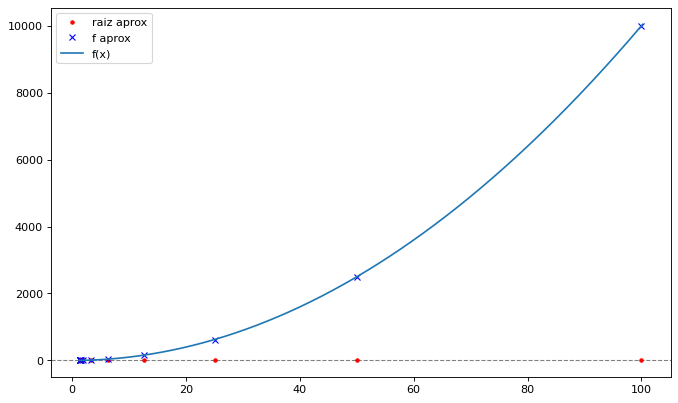

Raiz approx: 1.4142135623730951  exata:  1.4142135623730951
Erro       : 0.0


In [ ]:
# Nosso método
root = newton(f, df, x0=100, n=11)
print(root) # lista de raízes aproximadas

#Figura
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.', label="raiz aprox")
plt.plot(root, f(root), 'bx', label="f aprox")
x = np.linspace(np.min(root)-0.2, np.max(root)+0.2, 1000)
plt.plot(x, f(x), label="f(x)")
plt.legend(loc="upper left")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

Mas e a função que tem no scipy?
scipy.optimize.newton
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

In [ ]:
# Importar o Scipy
from scipy import optimize

root, r = optimize.newton(f, 100, df, full_output=True)
print(r)
print()
print("Raiz approx:", root, " exata:", root_exact) #ultimo valor do vetor
print("Erro       :", root - root_exact) #ultimo valor do vetor

      converged: True
           flag: converged
 function_calls: 22
     iterations: 11
           root: 1.4142135623730951

Raiz approx: 1.4142135623730951  exata: 1.4142135623730951
Erro       : 0.0


## ❗ Atividade ❗

Teste o método de Newton que implementamos para achar a raiz do seguinte polinômio partindo sempre de $x_0=100$:

$$ f(x) = (x - 1)^{3 n}, $$

onde $n$ é o último dígito não nulo do seu número USP.

Quantas iterações foram necessárias para garantir um erro menor que $10^{-5}$?

Será que o número de iterações varia conforme o $n$?


In [ ]:
# Código da resposta aqui
# Nosso método
root = newton(f, df, x0=100, n=11)
print(root) # lista de raízes aproximadas

#Figura
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.', label="raiz aprox")
plt.plot(root, f(root), 'bx', label="f aprox")
x = np.linspace(np.min(root)-0.2, np.max(root)+0.2, 1000)
plt.plot(x, f(x), label="f(x)")
plt.legend(loc="upper left")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor


Comentários da resposta aqui (número de iterações e observações):

##Casos problemáticos

**Caso 1:** Multiplicidade da raiz

$$f(x) = x^p$$


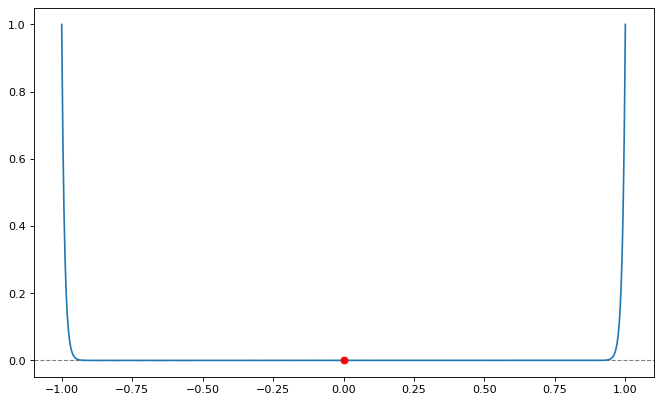

In [ ]:
p = 100
f = lambda x: x**p
df = lambda x: p*x**(p-1)

root_exact = 0.0

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.plot(root_exact, f(root_exact), 'ro')
plt.show()

In [ ]:
#Nosso newton

root = newton(f, df, x0=1, tol=10e-13)
print(root)

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.')
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

O valor da f já é menor do que 10e-13!!!! Mas estamos longe da raiz ainda...

Derivada muito perto de zero...parando em 466 iterações!
[1.         0.99       0.9801     0.970299   0.96059601 0.95099005
 0.94148015 0.93206535 0.92274469 0.91351725 0.90438208 0.89533825
 0.88638487 0.87752102 0.86874581 0.86005835 0.85145777 0.84294319
 0.83451376 0.82616862 0.81790694 0.80972787 0.80163059 0.79361428
 0.78567814 0.77782136 0.77004315 0.76234271 0.75471929 0.74717209
 0.73970037 0.73230337 0.72498034 0.71773053 0.71055323 0.70344769
 0.69641322 0.68944909 0.6825546  0.67572905 0.66897176 0.66228204
 0.65565922 0.64910263 0.6426116  0.63618549 0.62982363 0.62352539
 0.61729014 0.61111724 0.60500607 0.59895601 0.59296645 0.58703678
 0.58116641 0.57535475 0.5696012  0.56390519 0.55826614 0.55268348
 0.54715664 0.54168508 0.53626823 0.53090554 0.52559649 0.52034052
 0.51513712 0.50998575 0.50488589 0.49983703 0.49483866 0.48989027
 0.48499137 0.48014146 0.47534004 0.47058664 0.46588078 0.46122197
 0.45660975 0.45204365 0.44752321 0.44304798 0.4386175  0.43423133
 0.42

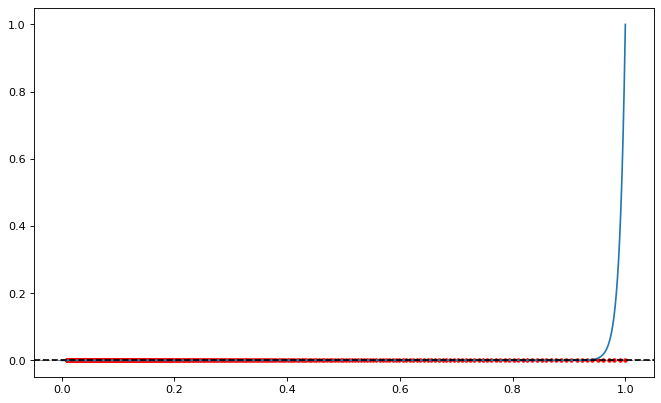

Raiz approx: 0.009246996270269201  exata:  0.0
Erro       : 0.009246996270269201


In [ ]:
#Nosso newton - Agora forçando outros critérios de parada
root = newton(f, df, x0=1, tol=10e-300)
print(root)

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.')
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

Qual o problema? **O método funciona, mas não tem convergência quadrática**

Qual a ordem de convergência nesse caso?

**Caso 2:** Órbita periódica

$$ f(x) = x-x^3, \quad x \in [-0.5, 0.5] $$

In [ ]:
# Ex periodico
f = lambda x : x-x*x*x
df = lambda x: 1- 3*x*x
#f = lambda x : np.sqrt(np.abs(x))*(2*np.heaviside(x,0)-1)
#df = lambda x: (1/2)/np.sqrt(np.abs(x))

root_exact = 0.0

#Nosso newton
x0 = 1/np.sqrt(5)
root = newton(f, df, x0=x0, n=10)
print(root)

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0, color='grey', lw='1', linestyle='--')
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.axhline(y=0, color='k',linestyle='--')
plt.plot(root, np.zeros_like(root), 'ro')
plt.plot(root, f(root), 'bx')
i=0
plt.plot(x, df(root[i])*(x-root[i])+f(root[i]), 'g--', label="tangente")
i=1
plt.plot(x, df(root[i])*(x-root[i])+f(root[i]), 'g--', label="tangente")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor






---



### Convergência

Uma sequência $\{x_{n}\}_n$ convergente para $\bar{x}$ é convergente de ordem $\alpha \ge 1$ se,
$$\lim_{n \to \infty} \frac{|x_{n+1}-\bar{x}|}{|x_n-\bar{x}|^{\alpha}} = \lambda \in \mathbb{R}.$$

$\alpha$ é chamado de **ordem de convergência da sequência**.

É possível mostrar que se a sequência converge com ordem $\alpha$ para o valor $\bar{x}$, então
$$\lim_{n \to \infty} \frac{|x_{n+1}-\bar{x}|}{|x_n-\bar{x}|^{\alpha}} = \lim_{n \to \infty} \frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}}.$$

É possível estimar a ordem de convergência de um método com base nas suas iterações. Vejamos. Para $n$ suficientemente grande
$$
\frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}} \approx \lambda .
$$
Mas observe que também vale para $n-1$,
$$
\frac{|x_{n}-x_{n-1}|}{|x_{n-1}-x_{n-2}|^{\alpha}} \approx \lambda,
$$
logo podemos escrever que
$$
\frac{|x_{n}-x_{n-1}|}{|x_{n-1}-x_{n-2}|^{\alpha}} \approx \frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}}
$$

de onde podemos tirar que
$$
\left(\frac{|x_n-x_{n-1}|}{|x_{n-1}-x_{n-2}|}\right)^{\alpha} \approx \frac{|x_{n+1}-x_n|}{|x_{n}-x_{n-1}|}
$$
e portanto
$$
\alpha \approx \frac  { \ln \left(\frac{|x_{n+1}-x_n|}{|x_{n}-x_{n-1}|}\right)}{\ln \left(\frac{|x_n-x_{n-1}|}{|x_{n-1}-x_{n-2}|}\right)}
$$

Ou seja, para calcular a ordem de convergência, basta usarmos informações de 4 iteradas da sequência, $x_{n-2},x_{n-1}, x_n, x_{n+1}$, para algum $n$ suficientemente grande.

In [ ]:
#Recebe um vetor com as estimativas e retorna diversas estimativas de ordem
def ordem(x, eps=10e-8):
  n = x.size #tamanho do vetor
  if x.size < 4:
    print("erro, poucos elementos")
    return 0

  #Vamos calcular a ordem para cada conjunto de 4 elementos da sequencia
  alpha_list = []
  for m in range(4, n):

    #Vamos evitar dividir por zero, então se as iteradas já mudam muito pouco, pare
    if np.abs(x[m-1]-x[m-2]) < eps:
      print("Ordem calculada com base na razão final: ", alpha_list[-1])
      return alpha_list

    #Calculo alpha com base nos elementos m, m-1, m-2, m-3
    alpha=np.log(np.abs((x[m]-x[m-1])/(x[m-1]-x[m-2])))/np.log(np.abs((x[m-1]-x[m-2])/(x[m-2]-x[m-3])))

    #Adiciono alpha na lista de alphas calculados
    alpha_list.append(alpha)

  print("Ordem aproximada calculada com base na razão final: ", alpha_list[-1])
  return alpha_list

Vejamos um exemplo de cálculo de ordem com a função:

$$ f(x) = x^p -2$$

com $p=4$ partindo de $x_0=1$.

In [ ]:
#Exemplo
p = 4
f = lambda x : x**p-2
df = lambda x: p*x**(p-1)

root = newton(f, df, x0=1, tol=10e-300)
print(root)

#Calcula da ordem
ord = ordem(root)
print(ord)



---



## ❗ Atividade ❗

Estime a ordem de convergência ($\alpha$) do método de Newton implementado com base na estimativa acima para os exemplos:

 1. $f(x) = x^p-2$ com $p=3$ e $x_0=10$

 2. $f(x) = (x-2)^p,$ com $p=4$ e $x_0=10$

 3. $f(x) = x^3 + x^2 + 2x/9$  e $x_0=0.2$
  
 **Dica:** Comece fazendo um gráfico da função!

**Cuidado!** Quando há mais de uma raiz, a ordem de convergência pode ser diferente para cada raiz. Teste isso na função (3) mudando o $x_0$.

Comente, para cada teste e cada raiz da função, se a convergência é

*   Linear ($\alpha \approx 1$)
*   Quadrática ($\alpha \approx 2$)
*   Cúbica ($\alpha \approx 3$)

Comente, também, o que acontece se aumentar o $p$ nos casos (1) e (2)?

**Cuidado!** A função que calcula ordem devolve um vetor com várias estimativas de ordens, analise esse vetor para decidir a ordem do método. Note que ordem correta é algo assintótico, ou seja, com $n$ muito grande, mas se o $n$ for muito grande, já estamos muito perto da raiz e da precisão de máquina.



In [ ]:
#Coloque aqui o seu código de respostas
# Função 1

#Resultados função 1

# Função 2

#Resultados função 2

# Função 3

#Resultados função 3

Coloque aqui observações sobre o exercício:



*   Função 1


*   Função 2


*   Função 3





---



## Bacia de atração

Dado um chute inicial, para que zero ele converge quando temos vários zeros na função?

In [ ]:
f = lambda x: x*(x-2)**2*(x+1)
df = lambda x: 4 - 9* x**2 + 4 *x**3

#Para cada raíz exata, vamos dar uma cor.
roots_exact = np.array([0.0, 2.0, -1.0])
colors = [ 'b.', 'r.', 'g.'] #, 'y', 'm', 'k',]

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
x = np.linspace(-1.2, 2.2, 100)
plt.plot(x, f(x))

# Para cada chute inicial, ver para qual raíz converge, e pinta da cor da raíz
for xi in x:
  ri = optimize.newton(f, xi, df) #Para onde convergiu?
  color = 'k.'
  for i, root in enumerate(roots_exact): #Acho a cor da raíz correspondente
    if np.abs(root-ri) < 0.01:
      color = colors[i]
  plt.plot(xi, 0.0 , color, marker="+")

#Plot das raízes
for i, root in enumerate(roots_exact):
    plt.plot(root, f(root), colors[i], marker="o")

plt.show()

# Método de Newton para complexos

Dado $z_0 \in \mathbb{C}$:

$$z_{i+1}=z_{i}-f(z)/f'(z) $$

O código é o mesmo de antes, só mudamos o tipo da variável "x"

In [ ]:
# Método de Newton, com parâmetros:
# f   : função
# df  : derivada da função
# x0  : chute inicial
# n   : número de iterações máximo
# tol  : limitar para critério de parada
# stop : tipo de critério de parada ("f" default, "x")

def newton(f, df, x0, n=1000, tol=10e-5, stop="f"):

  #x = np.zeros(n+2) # o vetor é um pouco maior que preciso...
  x = np.zeros(n+2, dtype=np.complex64) #vou permitir numeros complexos!
  x[0] = x0

  #Iteradas
  for i in range(n):

    # Se a derivada for muito perto de zero,... sem chances de continuar
    if np.abs(df(x[i])) < 10e-20:
      print("derivada muito perto de zero...parando em", i, "iterações!")
      return x[:i+1]

    #Aqui esta o método
    x[i+1] = x[i] - f(x[i])/df(x[i])

    # Critérios de parada
    if stop == "x": #Diferença em x pequena
      if np.abs(x[i+1]-x[i]) < tol:
        return x[:i+2]

    else: #stop == "f" # default # f pequeno
      if np.abs(f(x[i+1])) < tol:
        return x[:i+2]

  return x[:i+1]

In [ ]:
#Nossa função de interesse
f = lambda z: z**3 - 1
df = lambda z: 3*z**2

#f = lambda z: z**4 - 1
#df = lambda z: 4*z**3


In [ ]:
# Vamos chamar o nosso Newton!
z0 = -1-0.5j
root = newton(f, df, x0=z0, n=115)

# Plot das raizes
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.plot(root.real, root.imag, 'o')
for i, r in enumerate(root):
    print(r)
    plt.annotate(str(i), (root.real[i], root.imag[i]), fontsize=14)

plt.ylabel('Imag')
plt.xlabel('Real')
print()

##Fractais : A bacia de atração complexa

In [ ]:
# Dominio [-a,a] x [-i*a,i*a]
a = 2

# Discretização do domínio em 2000 pontos
d = 1001j #numero de pontos entre -a e a (inclusive)

#Malha de reais em R2
x, y = np.ogrid[-a:a:d,-a:a:d] #Vetores

# Malha de complexos
z0 = x + 1j*y

print(z0.shape)
print(z0[:10,:10])

In [ ]:
#Iterações de Newton em conjunto para todos os chutes iniciais!
niter = 200
eps = 1.e-16
np.seterr(divide='ignore', invalid='ignore')

z = z0
for i in range(niter):
    dftmp = df(z)
    dftmp[ np.abs(dftmp) < eps ] = np.nan
    z -= f(z)/dftmp




In [ ]:
#Saiu do domnínio?
z[ np.isnan(z) ] = 0.0 + 0j
z[ np.abs(z.real) > a-eps] = 0.0 + 0j
z[ np.abs(z.imag) > a-eps] = 0.0 + 0j
#print(np.angle(z))

#Raízes que achei
unique_roots = np.unique(z.round(decimals=2))
unique_roots = np.delete(unique_roots,(unique_roots==0j).argmax())
root_list = []
print("Raízes que achei (aproximadas):")
for root in unique_roots:
    root_list.append((root.real, root.imag))
    print(root)

nroots = len(unique_roots)


In [ ]:
#Transformar os valores das raízes imaginárias em cores!
zcol= np.zeros_like(z, dtype=np.int64)
tol=0.01
for i, root in enumerate(unique_roots):
    zcol[np.abs(z-root)<tol] = i

#Inverte eixos para plots
zcol = zcol.swapaxes(0,1)

# inverte ordem do eixo y (plotar de baixo para cima)
#zcol = zcol[:, ::-1]


# Cores das raízes
colors = [ 'g', 'b', 'r', 'y', 'm', 'k',]
cmap = ListedColormap(colors[:nroots])

print(zcol)

In [ ]:
#Plot figure

plt.figure(figsize=(16,16))
plt.imshow(zcol, cmap=cmap, extent=[-a, a, -a, a])
for x,y in root_list:
    print("Roots:", x,y)
    plt.scatter(x, y, s=50, c='black', marker='o')



Aumente a resolução para ver mais detalhes!



---

## 🧩 Atividade opcional 🧩

Tente fazer com que a cor seja proporcional ao número de iterações. Assim, os pontos que convergem mais rápido ficam mais pertos de branco (pinte a raíz de branco também), e os chutes iniciais que usam muitas iterações terão a cor forte da respectiva raíz.

Exemplo do Wikipedia: https://en.wikipedia.org/wiki/Newton_fractal


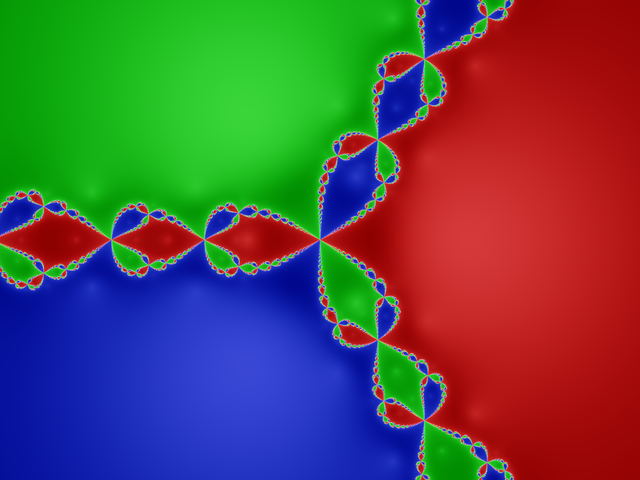

In [ ]:
# Códigos: